In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("./drive/My Drive/Нейронефть")

In [5]:
# read the Prophet model object
import pickle
import pandas as pd
pkl_path = "./Prophet.pkl"

with open(pkl_path, 'rb') as f:
    model = pickle.load(f)

forecast = pd.read_pickle(pkl_path)

In [25]:
df = pd.read_csv("data.csv")

In [48]:
last_date = df["ds"][-1:].values
now_date = "2020-10-19"
delta = pd.to_datetime(now_date) - pd.to_datetime(last_date)
periods = delta.days[0]

future = model.make_future_dataframe(periods=periods)
future.tail()

,ds
8467,2020-08-31
8468,2020-09-01
8469,2020-09-02
8470,2020-09-03
8471,2020-09-04


In [49]:
forecast = model.predict(future)
"""
yhat - предсказанное значение
yhat_lower/yhat_upper - диапазон
"""
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail() #tail(number=5) - выводит последние строки

,ds,yhat,yhat_lower,yhat_upper
8467,2020-08-31,43.721852,28.658256,58.538912
8468,2020-09-01,43.705381,29.238678,59.684296
8469,2020-09-02,43.688909,30.119035,58.721809
8470,2020-09-03,43.672438,28.903894,58.728943
8471,2020-09-04,43.655967,28.743567,58.646724


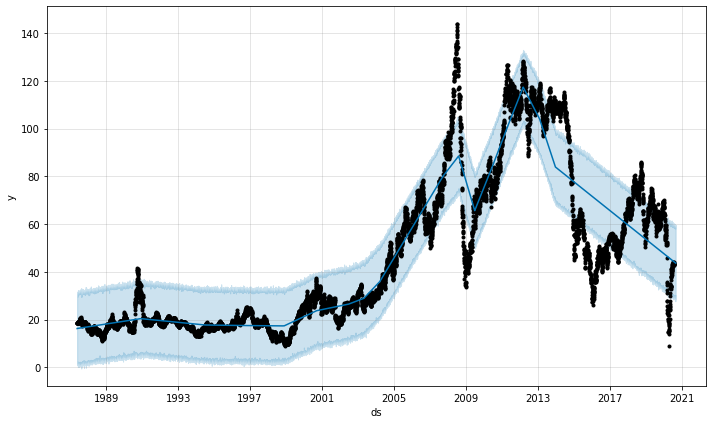

In [50]:
fig1 = model.plot(forecast)

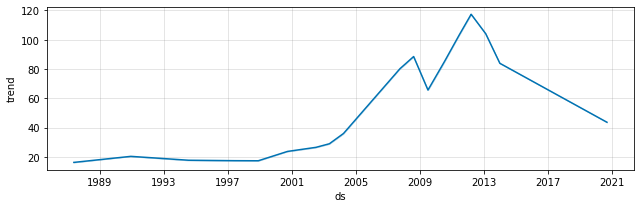

In [51]:
fig2 = model.plot_components(forecast)

In [53]:
print(forecast["yhat"][-1:].values[0]) #предсказанное значение

43.65596701859347
